# Busqueda por Profundidad

A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [91]:
# Busqueda en Profundidad
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [92]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.

Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.


Subir el cuaderno con la resolucion.


In [93]:
# Implementar PRACTICA
#Implementar un algoritmo que me permita dibujar la busqueda de soluciones.

#Definimos una funcion para obtener el costo - CompareTo (Java)

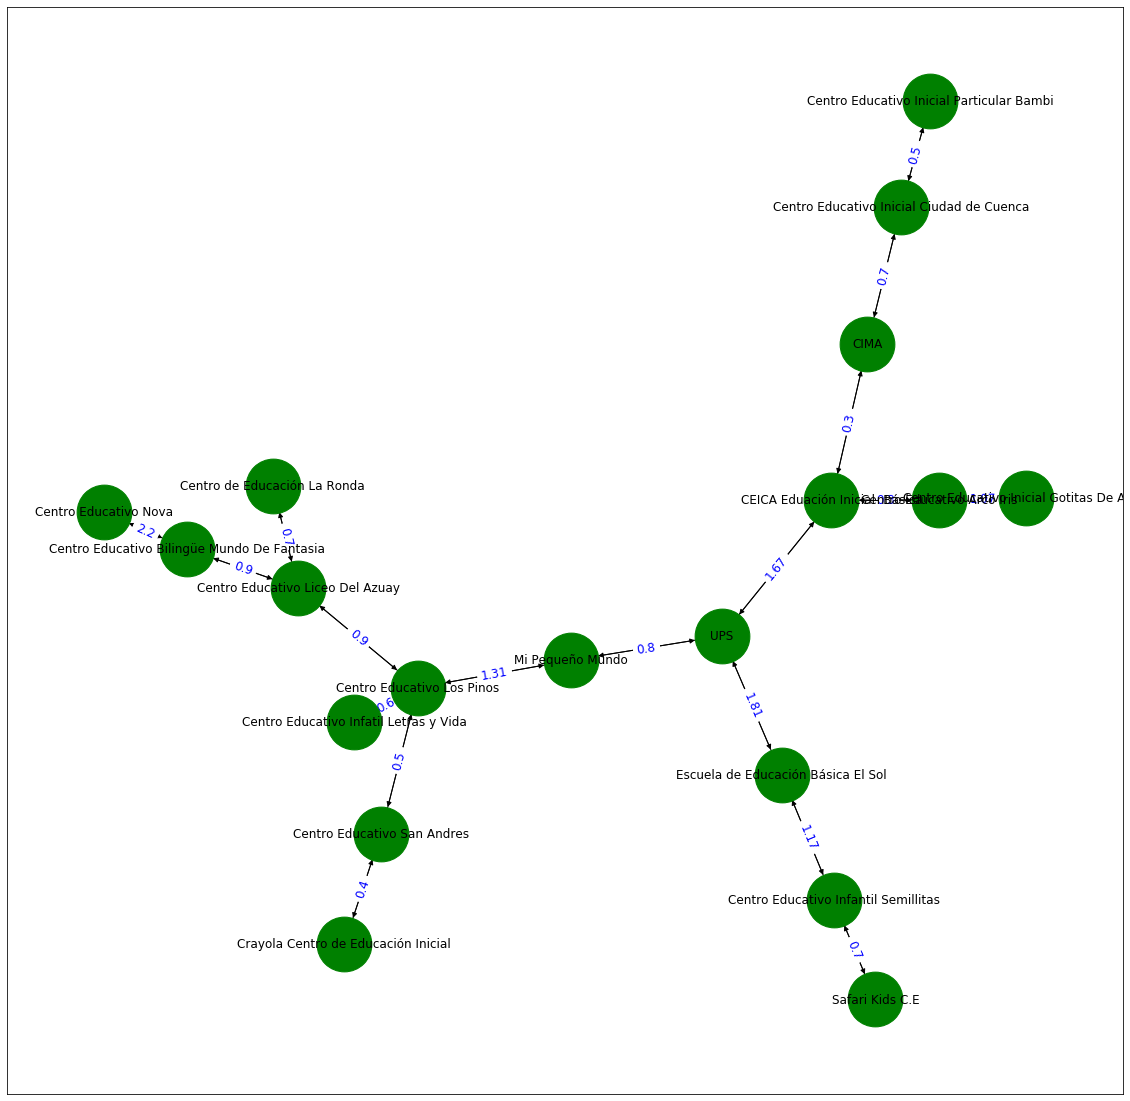

In [120]:
# Implementar PRACTICA
# Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida 
# y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como 
# primer nivel los mas cercanos y a continuacion los demas.
connections = {
        'UPS': {'CEICA Eduación Inicial- Básica':1.67,'Mi Pequeño Mundo':0.8,'Escuela de Educación Básica El Sol':1.81},
        'Escuela de Educación Básica El Sol': {'Centro Educativo Infantil Semillitas':1.17,'UPS':1.81},
        'Centro Educativo Infantil Semillitas': {'Safari Kids C.E':0.7,'Escuela de Educación Básica El Sol':1.17},
        'Safari Kids C.E': {'Centro Educativo Infantil Semillitas':0.7},
        'Mi Pequeño Mundo': {'Centro Educativo Los Pinos':1.31,'UPS':0.8},
        'Centro Educativo Los Pinos': {'Centro Educativo Liceo Del Azuay':0.9,'Centro Educativo San Andres':0.5, 'Centro Educativo Infatil Letras y Vida':0.6,'Mi Pequeño Mundo':1.31},
        'Centro Educativo Liceo Del Azuay': {'Centro Educativo Bilingüe Mundo De Fantasia':0.9,'Centro de Educación La Ronda':0.7, 'Centro Educativo Los Pinos':0.9},
        'Centro Educativo Bilingüe Mundo De Fantasia': {'Centro Educativo Nova':2.20,'Centro Educativo Liceo Del Azuay':0.9},
        'Centro Educativo Nova': {'Centro Educativo Bilingüe Mundo De Fantasia':2.20},
        'Centro de Educación La Ronda': {'Centro Educativo Liceo Del Azuay':0.7},
        'Centro Educativo San Andres': {'Crayola Centro de Educación Inicial':0.4, 'Centro Educativo Los Pinos':0.5},
        'Crayola Centro de Educación Inicial': {'Centro Educativo San Andres':0.4},
        'Centro Educativo Infatil Letras y Vida': {'Centro Educativo Los Pinos':0.6},
        'CEICA Eduación Inicial- Básica': {'Centro Educativo Arco Iris':0.3,'CIMA':0.3,'UPS':1.67},
        'Centro Educativo Arco Iris': {'Centro Educativo Inicial Gotitas De Amor':1.07,'CEICA Eduación Inicial- Básica':0.3},
        'Centro Educativo Inicial Gotitas De Amor': {'Centro Educativo Arco Iris':1.07},
        'CIMA': {'Centro Educativo Inicial Ciudad de Cuenca':0.7,'CEICA Eduación Inicial- Básica':0.3},
        'Centro Educativo Inicial Ciudad de Cuenca': {'Centro Educativo Inicial Particular Bambi':0.5,'CIMA':0.7},
        'Centro Educativo Inicial Particular Bambi': {'Centro Educativo Inicial Ciudad de Cuenca':0.5}
}


def generarGrafico(datos):
    grafico = nx.DiGraph()
    grafico.add_nodes_from(datos)
    for valor, listaValor in datos.items():
        for a in listaValor:
            grafico.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
    pos = nx.spring_layout(grafico)
    plt.figure(figsize=(20,20)) 
    labels = nx.get_edge_attributes(grafico,'length')
    nx.draw_networkx(grafico, pos, node_color = 'green', with_labels = True, node_size=3000)
    nx.draw_networkx_edge_labels(grafico,pos,edge_labels=labels,font_color='blue',font_size=12)
    plt.show()
    
    
generarGrafico(connections)


In [119]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited,x,costo,g):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        init_node.cost=round(costo,2)
        #g.add_node(init_node.data,color='red')
        return init_node # Retorno el nodo resultado
    else: 
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        child_list=[]
        for node in x[node_data]:
            child = Node(node)
            cost = x[node_data][node]
            child.cost=round(cost,2)
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        for son in init_node.child: # Recorrer los nodos hijos
            if not son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva 
                costo=costo+son.cost
                #g.add_edge(init_node.data,son,label=costo)
                Solution = search_profundidad(son, solution, visited,x,costo,g) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = 'UPS' # Creamos un estado inicial
solution = 'Centro Educativo Nova' # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)  
costo = 0
node = search_profundidad(init_node, solution, visited,connections,costo,Grafo) # Llamamos la metodo de busqueda
# Mostrar Resultado
result = []
if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() # Reverso el resultado (Solo para presentar)
    print("BUSQUEDA POR PROFUNDIDAD")
    print("")
    print(result)
    print("Costo total: %s" % str(fcosto)) # Imprimir el costo total de llegar al nodo
else:
    print("No hay solucion")

BUSQUEDA POR PROFUNDIDAD

['UPS', 'Mi Pequeño Mundo', 'Centro Educativo Los Pinos', 'Centro Educativo Liceo Del Azuay', 'Centro Educativo Bilingüe Mundo De Fantasia', 'Centro Educativo Nova']
Costo total: 7.91


In [83]:
# Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.
import random
n = 4
soluciones = [] 
tablero = [] 
#Bucle que inicializa el tablero con ceros
for i in range(n):
    tablero.append([0 for j in range(n)])

#METODO QUE UBICA LAS REINAS EN EL TABLERO
def ubicarReinas(i):
    if(i >= n): 
        #print("Termina")
        return 0
    #print("Ingresa a nodo:", i)
    f, c = (i, genAle(soluciones, n)) 
    #print("Fila:", f, "Columna:", c)
    if(esValido((f, c))): 
        soluciones.append((f, c)) 
        ubicarReinas(i + 1) 
    else: 
        #print("Vuelve a nodo anterior:", i - 1) 
        soluciones.pop()
        ubicarReinas(i - 1) 
#METODO QUE VALIDA LA POSICION EN LA QUE SE UBICAN LAS REINAS
def esValido(posicion):
    f, c = posicion
    valido = False
    if(len(soluciones) == 0): 
        valido = True
    for i in range(len(soluciones)):
        f_r, c_r = soluciones[i]
        #print("Entra >","Posicion Reina:", (f_r, c_r), "Posicion nueva:", (f, c))
        if(c_r != c and abs(f_r - f) != abs(c_r - c)):  
            #print("Cumple >>", "Posicion Reina:", (f_r, c_r), "Posicion Nueva:", (f, c))
            valido = True
        else:
            #print("NO Cumple >>>", "Posicion Reina:", (f_r, c_r), "Posicion nueva:", (f, c))
            valido = False
            break 
    return valido 
#METODO QUE GENERA POSICIONES ALEATORIAS PARA LAS COLUMNAS DE LAS REINAS
def genAle(soluciones, n):
    if(len(soluciones) == 0):
        return random.randint(0, n - 1) 
    c = soluciones[len(soluciones)-1][1]
    arr = [c - 1, c, c + 1]  
    if(len(soluciones) > 1):
        for i in range(len(soluciones) - 1):
            c = soluciones[i][1] 
            arr.append(c) 
    #print(soluciones, arr, n)
    aleatorio = True 
    aux = 0 
    while(aleatorio): 
        alt = random.randint(0, n - 1) 
        cont = 0
        for i in range(len(arr)): 
            if(arr[i] != alt): 
                cont += 1
            if(arr[i] == alt): 
                aux += 1 
        if(cont >= len(arr)): 
            aleatorio = False 
            return alt
        if(aux >= len(arr)):
            aleatorio = False 
            return 0 
ubicarReinas(0) 
print("Solucion:", soluciones)
for i in  range(len(soluciones)): 
    tablero[soluciones[i][0]][soluciones[i][1]] = 1 

print("\nUbicacion en el tablero:")
for i in range(len(tablero)):
    print(tablero[i])

Solucion: [(0, 2), (1, 0), (2, 3), (3, 1)]

Ubicacion en el tablero:
[0, 0, 1, 0]
[1, 0, 0, 0]
[0, 0, 0, 1]
[0, 1, 0, 0]


# Conclusiones

Para realizar la pracrica debemo saber como actua el metodo de busqueda en profunidad. En este trabajo se ubico centros educativos en el Google maps, luego graficamos el árbol donde estan todas las rutas.

También se utilizo el metodo de profundidad para colocar en un tablero las 4 reinas.